In [1]:
import idx2numpy
import gzip

ModuleNotFoundError: No module named 'idx2numpy'

In [ ]:
def load_idx2numpy(file_path):
    with open(file_path, 'rb') as f:
        return idx2numpy.convert_from_file(f)

#loading data
x_train= load_idx2numpy('/Users/anushka/Documents/Summer-Project-/archive/train-images.idx3-ubyte')
y_train= load_idx2numpy('/Users/anushka/Documents/Summer-Project-/archive/train-labels.idx1-ubyte')
x_test= load_idx2numpy('/Users/anushka/Documents/Summer-Project-/archive/t10k-images.idx3-ubyte')
y_test= load_idx2numpy('/Users/anushka/Documents/Summer-Project-/archive/t10k-labels.idx1-ubyte')
print("train images shape: ", x_train.shape)
print("train labels shape: ", y_train.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (60000,)


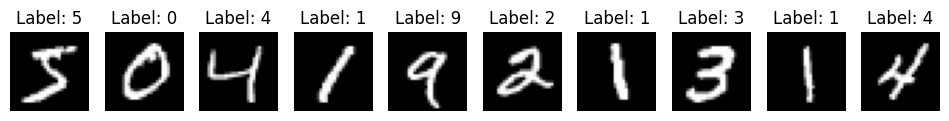

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

show_images(x_train, y_train, n=10)


In [ ]:
#clone the repo in the terminal 
import os
from PIL import Image
output_base_dir = '/Users/anushka/Documents/Summer-Project-/processed_mnist'

# Create train and test directories
train_dir = os.path.join(output_base_dir, 'train')
test_dir = os.path.join(output_base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create class subdirectories (0-9)
for i in range(10):
    os.makedirs(os.path.join(train_dir, str(i)), exist_ok=True)
    os.makedirs(os.path.join(test_dir, str(i)), exist_ok=True)

# Save training images
for i, (image_array, label) in enumerate(zip(x_train, y_train)):
    img = Image.fromarray(image_array) # MNIST images are grayscale
    img_path = os.path.join(train_dir, str(label), f'image_{i:05d}.png')
    img.save(img_path)

# Save testing images
for i, (image_array, label) in enumerate(zip(x_test, y_test)):
    img = Image.fromarray(image_array) # MNIST images are grayscale
    img_path = os.path.join(test_dir, str(label), f'image_{i:05d}.png')
    img.save(img_path)

print(f"Processed MNIST data saved to: {output_base_dir}")

Processed MNIST data saved to: /Users/anushka/Documents/Summer-Project-/processed_mnist


In [ ]:
from torchvision import datasets, transforms

data_transform = transforms.ToTensor()
train_data = datasets.ImageFolder(
    root='/Users/anushka/Documents/Summer-Project-/processed_mnist/train',
    transform=data_transform
)
test_data = datasets.ImageFolder(
    root='/Users/anushka/Documents/Summer-Project-/processed_mnist/test',
    transform=data_transform
)

print(len(train_data), train_data[0][0].shape)

60000 torch.Size([3, 28, 28])
